#### Задание, оцениваемое сокурсниками:
## Центральная предельная теорема своими руками

Использовано распределение Парето    
https://ru.wikipedia.org/wiki/Распределение_Парето

Это распределение - наверное, одно из самых известных. Во многом благодаря знаменитому правилу 80/20, в которое "укладываются" многие явления. Например, распределение дохода: "20% популяции владеет 80% богатства". Или не менее классическое правило "20% сотрудников выполняют 80% работы и наоборот". Или распределение популярности имён. Или распределение размера населённых пунктов...

Плотность распределения Парето имее вид: $$ f_{X}(x)={\begin{cases}{\frac {x^k_m}{x^{k+1}}},&x\geq 0,\\0,&x<0.\end{cases}}. $$
Математическое ожидание: $${\mathbb  {E}}[X]={\frac  {kx_m}{{k-1}}}$$
Дисперсия: $${D}[X]={\left(\frac {x_m}{k-1}\right)^2}{\frac  {k}{k-2}}$$




In [1]:
"""
Это техническая ячейка. Её наличие связано с тем, что в установленной на моём компьютере
версии ipython (и, соответственно, модуля matplotlib) появляется предупреждение:

UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

Для совместимости с более ранними версиями я не стал заменять 'normed' на 'density', но 
при этом в данной ячейке отключил показ таких предупреждений, чтобы не засорять вывод.
"""

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import norm
%matplotlib inline

Будем использовать распределение Парето с параметрами Xm = 1, k = 7.2

In [3]:
k_par = 7.2    # так обозначаем наше k
xm = 1

# Определим математическое ожидание и дисперсию
# Сначала по вышеприведенным формулам
mean = k_par * xm / (k_par - 1)
var = (xm / (k_par - 1)) ** 2 * k_par / (k_par - 2)

# Потом (для проверки) с помощью метода pareto.stats
mean0, var0 = pareto.stats(k_par, moments='mv')

In [4]:
# Математическое ожидание (по формуле):
mean

1.1612903225806452

In [5]:
# Математическое ожидание (проверка с помощью метода из модуля):
mean0

array(1.16129032)

In [6]:
# Дисперсия (по формуле):
var

0.03602017129592572

In [7]:
# Дисперсия (проверка с помощью метода):
var0

array(0.03602017)

Как видим, всё совпадает. Можно дальше спокойно использовать полученные по формуле значения.

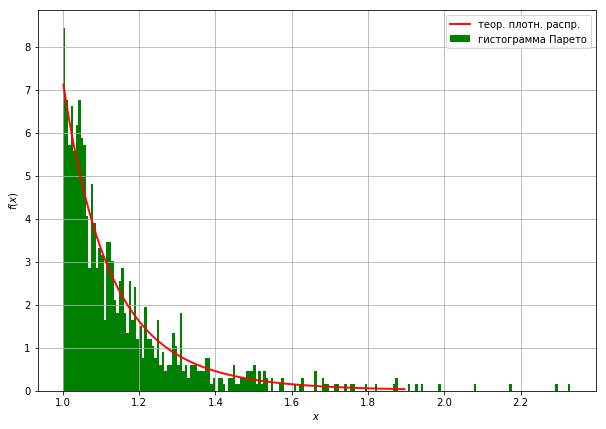

In [8]:
# Определям отрезок для построения плотности распределения 
# Выбираем 100 значений в диапазоне значений функции распределения от 0,01 до 0,99 
x = np.linspace(pareto.ppf(0.01, k_par), pareto.ppf(0.99, k_par), 100)

# Выборка из 1000 случайных величин, имеющих распределение Парето
r = pareto.rvs(k_par, size=1000)

# Теперь можно построить гистограмму и функцию распределения
plt.rcParams["figure.figsize"] = 10, 7
plt.rcParams["axes.grid"] = True
plt.hist(r, bins=200, normed=True, facecolor='g', label='гистограмма Парето')
plt.plot(x, pareto.pdf(x, k_par),'red', lw=2, alpha=0.95, label='теор. плотн. распр.')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

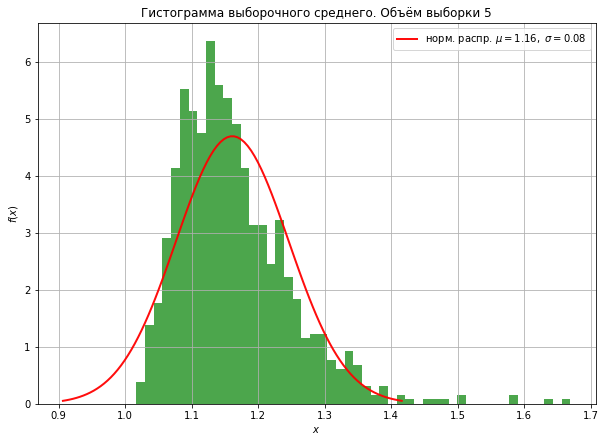

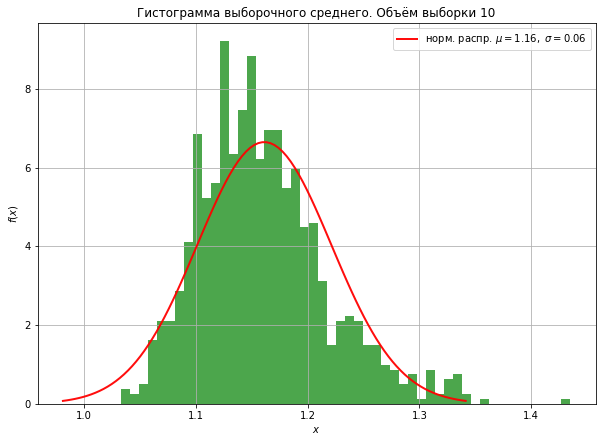

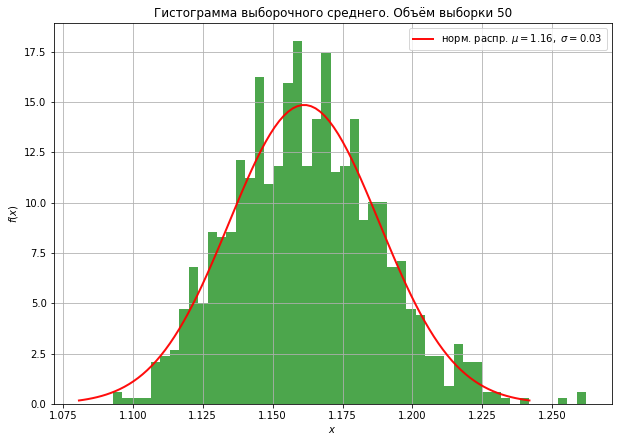

In [9]:
# создаём нулевую матрицу, для вспомогательного сохранения параметров графиков
ax_zero = np.zeros((3,4))
j = 0   # инициализация счётчика номера окна

# Выбираем три размера выборки 5, 10, 50
for n_sam in [5, 10, 50]:

    # Размер окна графика и оси
    plt.rcParams["figure.figsize"] = 10, 7
    plt.rcParams["axes.grid"] = True

    # В отдельном окне отображается каждая выборка
    plt.figure(j)
            
    # pareto.rvs(k_par, size=n) - выборка n случайных величин из распределения Парето
    # scipy.mean - функция возвращает среднеее значение
    sc_arr = scipy.array([scipy.mean(pareto.rvs(k_par, size=n_sam)) for i in range(1000)])

    # По данной выборке получаем гистограмму
    plt.hist(sc_arr, bins=50, normed=True, facecolor='g', histtype='barstacked', alpha=0.7)

    # Получаем среднеквадратичное отклонение, используя рассчитанное значение дисперсии
    sigma = math.sqrt(var / n_sam)

    # Функция нормального распределения с параметрами: 
    # - мат. ожитание: mean (рассчитано выше по формуле),
    # - среднеквадратичное отклонение: sigma 
    norm_rv = norm(loc=mean, scale=sigma)

    # Используем правило трёх сигм для получения отрезка, на котором будет  
    # изображаться плотность нормального распределения
    x = np.linspace(mean-3*sigma,mean+3*sigma, 100)
    plt.plot(x, norm_rv.pdf(x),'red', lw=2, alpha=0.95, label='норм. распр. ' + r'$\mu='
             + str(np.round(mean,2)) + ',\ \sigma=' + str(np.round(sigma,2)) + '$')

    # Для сохранения размер шкал 
    ax_zero[j] = plt.axis()
    plt.title('Гистограмма выборочного среднего. Объём выборки ' + str(n_sam))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    j += 1

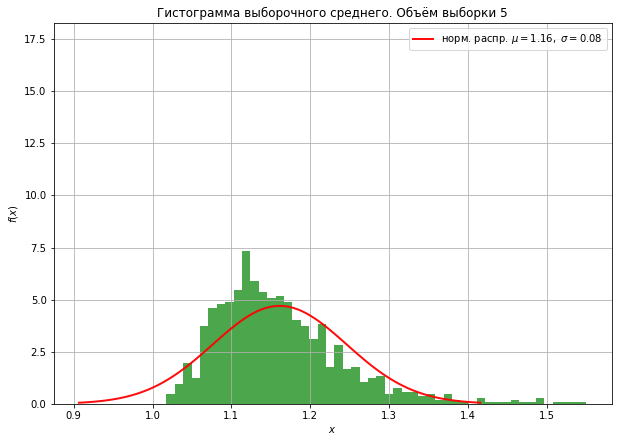

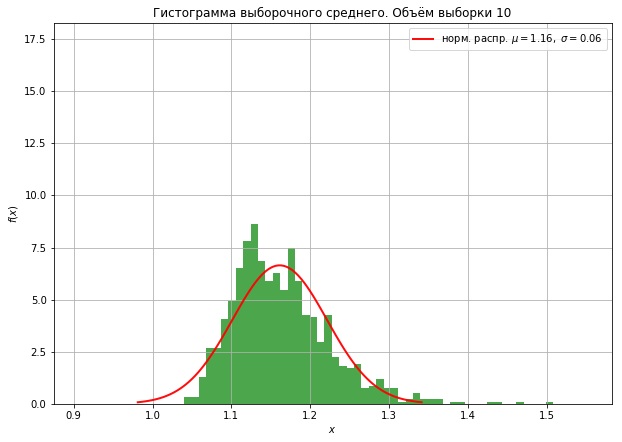

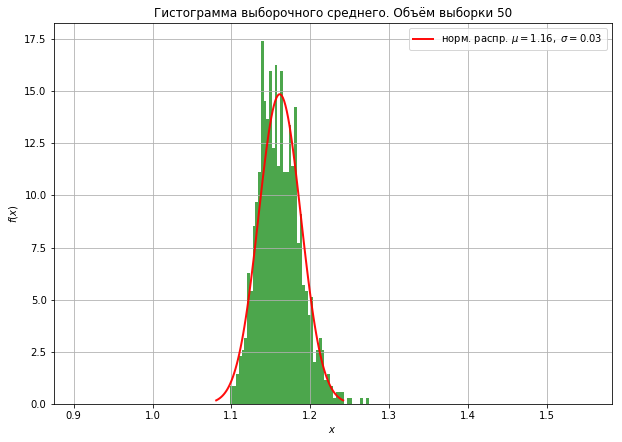

In [10]:
# Для наглядности повторяем, но при этом приравниваем шкалы всех графиков

ax_zero = np.zeros((3,4))
j = 0

for n_sam in [5, 10, 50]:
    plt.rcParams["figure.figsize"] = 10, 7
    plt.rcParams["axes.grid"] = True
    plt.figure(j)
    sc_arr = scipy.array([scipy.mean(pareto.rvs(k_par, size=n_sam)) for i in range(1000)])
    plt.hist(sc_arr, bins=50, normed=True, facecolor='g', histtype='barstacked', alpha=0.7)
    sigma = math.sqrt(var / n_sam)
    norm_rv = norm(loc=mean, scale=sigma)
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
    plt.plot(x, norm_rv.pdf(x),'red', lw=2, alpha=0.95, label='норм. распр. ' + r'$\mu='
             + str(np.round(mean,2)) + ',\ \sigma=' + str(np.round(sigma,2)) + '$')
    ax_zero[j] = plt.axis()
    plt.title('Гистограмма выборочного среднего. Объём выборки ' + str(n_sam))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    j += 1

for j in [0,1,2]:
    plt.figure(j)
    plt.axis([min(ax_zero[:,0]), max(ax_zero[:,1]), min(ax_zero[:,2]), max(ax_zero[:,3])])


Выводы: 

Данный пример подтверждает справедливость центральной предельной теоремы. Действительно, чем больше объем выборки, тем более гладким становится распределение и тем в большей степени оно похоже на нормальное. 

Как видим, распределение выборочного среднего приближается к нормальному при размере выборки 50 и более. При этом точность аппроксимации распределения выборочных средних нормальным значительно улучшается с ростом размера выборки.